In [ ]:
!pip install matplotlib

In [ ]:
!pip install opencv-python-headless numpy

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

In [ ]:
#connect drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
path = '/content/gdrive/MyDrive/Thesis/OCR_Implementation'

In [ ]:
def count_files(directory):
    folders = [name for name in os.listdir(directory)]
    return len(folders)

In [ ]:
total=count_files(path)-1
total

5

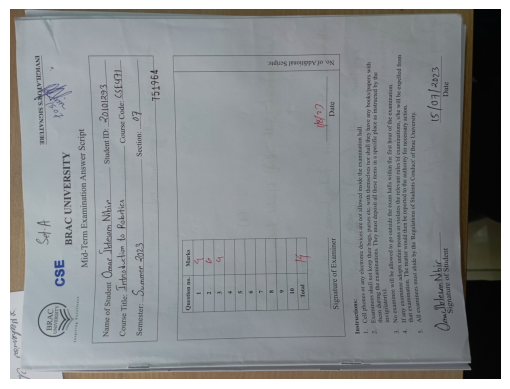

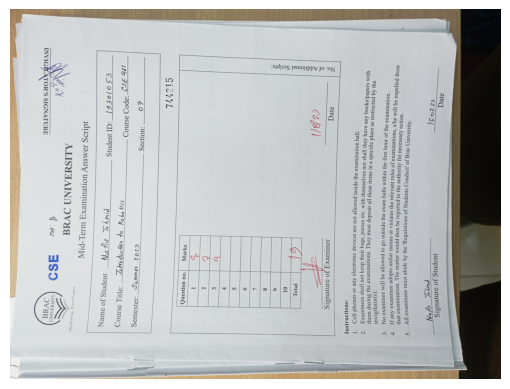

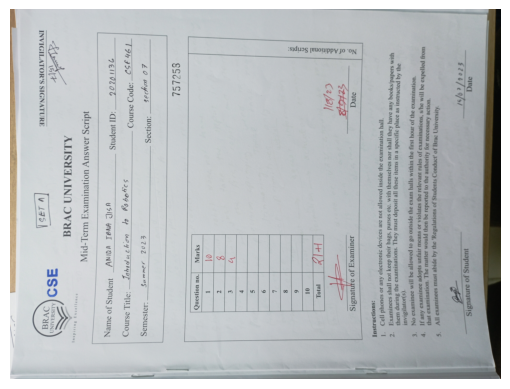

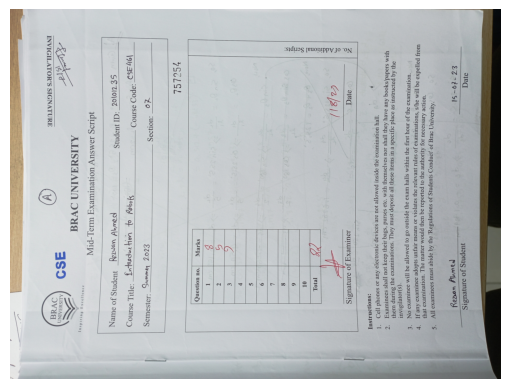

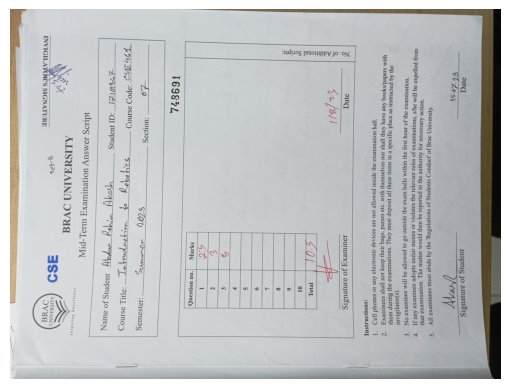

In [ ]:
#verify images (human)
from PIL import Image
import matplotlib.pyplot as plt
for i in range (0,total):
  image_path = path+'/'+str(i)+'.jpg'
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

In [ ]:
#digit detection using AI models
def detectDigits(img_path):
    pass

In [ ]:
def detectDigits(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
  img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
  # Cropping an image
  y_start=1525
  y_end=1605
  x_start=940
  x_end=1020
  q1 = img[1525:1605, 940:1020]
  y_start+=85
  y_end+=85
  q2 = img[y_start+1:y_end+1, x_start:x_end]
  y_start+=85
  y_end+=85
  q3 = img[y_start+1:y_end+1, x_start:x_end]
  y_start+=85
  y_end+=85
  q4 = img[y_start+1:y_end+1, x_start:x_end]
  y_start+=85
  y_end+=85
  q5 = img[y_start+1:y_end+1, x_start:x_end]
  y_start+=85
  y_end+=85
  q6 = img[y_start+1:y_end+1, x_start:x_end]
  y_start+=85
  y_end+=85
  q7 = img[y_start+1:y_end+1, x_start:x_end]
  y_start+=85
  y_end+=85
  q8 = img[y_start+1:y_end+1, x_start:x_end]
  y_start+=85
  y_end+=85
  q9 = img[y_start+1:y_end+1, x_start:x_end]
  y_start+=85
  y_end+=85
  q10 = img[y_start+1:y_end+1, x_start:x_end]

  y_start+=85
  y_end+=85
  total1 = img[2390:2460, 920:990]
  total2 = img[2390:2460, 990:1060]

  s1 = img[1000:1080, 2100:2180]
  s2 = img[1000:1075, 2180:2255]

  id1 = img[730:815, 2095:2180] #2
  id2 = img[765:815, 2180:2230] #0
  id3 = img[790:810, 2230:2250] #1
  id4 = img[765:810, 2250:2295] #0
  id5 = img[790:810, 2295:2315] #1
  id6 = img[750:805, 2315:2360] #2
  id7 = img[755:805, 2360:2405] #9
  id8 = img[740:800, 2405:2465] #3

  # Display cropped image
  cv2_imshow(q1)
  cv2_imshow(q2)
  cv2_imshow(q3)
  cv2_imshow(id1)
  cv2_imshow(id2)
  cv2_imshow(id3)
  cv2_imshow(id4)
  cv2_imshow(id5)
  cv2_imshow(id6)
  cv2_imshow(id7)
  cv2_imshow(id8)
  cv2_imshow(s1)
  cv2_imshow(s2)
  cv2_imshow(total1)
  cv2_imshow(total2)

  cv2.waitKey(0)
  cv2.destroyAllWindows()
  return q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,total1,total2,s1,s2,id1,id2,id3,id4,id5,id6,id7,id8

In [ ]:
#test
i=0
image_path = path+'/'+str(i)+'.jpg'
input_list=detectDigits(image_path)

In [ ]:
def preprocess_input(img):
  img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  alpha = 1.9  # Contrast control (1.0-3.0)
  img = np.clip(alpha * img, 0, 255).astype(np.uint8)
  img_resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
  img_resized = cv2.bitwise_not(img_resized)
  cv2_imshow(img_resized)

  cv2.waitKey(0)
  cv2.destroyAllWindows()

  arr = np.array([img_resized])
  arr = arr.reshape(arr.shape[0], 28, 28, 1).astype('float32') / 255
  return arr

In [ ]:
model = load_model('/content/gdrive/MyDrive/Thesis/Models_compiled/mnist_model.h5')
all_student_numbers=[]
all_student_id=[]
all_student_section=[]

i=0
image_path = path+'/'+str(i)+'.jpg'
input_list=detectDigits(image_path)
j=0
number=[]
section=[]
id=[]
for img in input_list:
  input_data=preprocess_input(img)
  predictions = model.predict(input_data)
  result=np.argmax(predictions)
  print(result)
  if j<12:
    number.append(result)
  elif j<14:
    section.append(result)
  else:
    id.append(result)
  j+=1
all_student_numbers.append(number)
strId=''
strSection=''
for k in id:
  strId+=str(k)
for k in section:
  strSection+=str(k)
all_student_id.append(strId)
all_student_section.append(strSection)
tf.keras.backend.clear_session()

1/1 [==============================] - 0s 118ms/step
9


1/1 [==============================] - 0s 33ms/step
6


1/1 [==============================] - 0s 36ms/step
5


1/1 [==============================] - 0s 36ms/step
1


1/1 [==============================] - 0s 43ms/step
1


1/1 [==============================] - 0s 40ms/step
1


1/1 [==============================] - 0s 33ms/step
1


1/1 [==============================] - 0s 31ms/step
1


1/1 [==============================] - 0s 38ms/step
1


1/1 [==============================] - 0s 42ms/step
1


1/1 [==============================] - 0s 33ms/step
5


1/1 [==============================] - 0s 40ms/step
1


1/1 [==============================] - 0s 38ms/step
2


1/1 [==============================] - 0s 42ms/step
7


1/1 [==============================] - 0s 32ms/step
2


1/1 [==============================] - 0s 37ms/step
3


1/1 [==============================] - 0s 44ms/step
6


1/1 [==============================] - 0s 33ms/step
3


1/1 [==============================] - 0s 21ms/step
1


1/1 [==============================] - 0s 22ms/step
2


1/1 [==============================] - 0s 24ms/step
3


1/1 [==============================] - 0s 22ms/step
3


In [ ]:
print(all_student_id)
print(all_student_section)
print(all_student_numbers)

['23631233']
['27']
[[9, 6, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1]]


In [ ]:
import csv

# Data to be written into the CSV file
data = [['Section', 'Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10','Total']]

for i in range(0,len(all_student_id)):
  data.append([all_student_section[i],all_student_id[i],all_student_numbers[i][0],
              all_student_numbers[i][1],all_student_numbers[i][2],all_student_numbers[i][3],
              all_student_numbers[i][4],all_student_numbers[i][5],all_student_numbers[i][6],
              all_student_numbers[i][7],all_student_numbers[i][8],all_student_numbers[i][9],
               str(all_student_numbers[i][10])+str(all_student_numbers[i][11])])

# Specify the file path
result_file_path = '/content/gdrive/MyDrive/Thesis/OCR_Implementation/Result/grade.csv' # Replace with your desired file path

# Writing data to the CSV file
with open(result_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f'CSV file has been created at: {result_file_path}')


CSV file has been created at: /content/gdrive/MyDrive/Thesis/OCR_Implementation/Result/grade.csv
